# Sayan Kumar
# Task 4
# EMAIL SPAM DETECTION WITH MACHINE LEARNING
# Oasis Infobyte

In [1]:
#import librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the dataset using pandas
df = pd.read_csv("spam.csv",encoding="latin-1")

In [3]:
#print the first 5 datasets
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# Removing other columns

In [6]:
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [7]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

# Classify The Emails

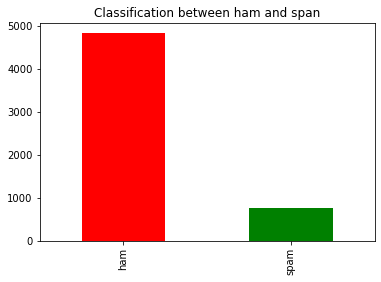

In [10]:
df1= pd.value_counts(df['v1'])
df1.plot(kind='bar',color=['red','green'])
plt.title("Classification between ham and span")
plt.show()

In [11]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Simplify The Data

In [12]:
for i in range(0,5572):
    if df['v1'][i]=='spam':
        df['v1'][i]=0
    else:
        df['v1'][i]=1

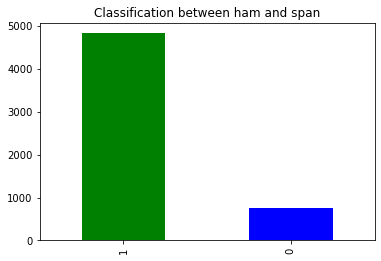

In [13]:
df1= pd.value_counts(df['v1'])
df1.plot(kind='bar',color=['green','blue'])
plt.title("Classification between ham and span")
plt.show()

# Train Test Split

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(df.v2, df.v1,test_size=0.3, random_state=42 )

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()
x_train_new= cv.fit_transform(x_train)

In [19]:
y_test

3245    1
944     1
1044    0
2484    1
812     0
       ..
2505    1
2525    1
4975    1
650     1
4463    1
Name: v1, Length: 1672, dtype: object

In [20]:
x_train

708     To review and KEEP the fantastic Nokia N-Gage ...
4338                   Just got outta class gonna go gym.
5029    Is there coming friday is leave for pongal?do ...
4921    Hi Dear Call me its urgnt. I don't know whats ...
2592    My friend just got here and says he's upping h...
                              ...                        
3772    I came hostel. I m going to sleep. Plz call me...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860                   In work now. Going have in few min.
Name: v2, Length: 3900, dtype: object

In [21]:
y_train

708     0
4338    1
5029    1
4921    1
2592    1
       ..
3772    1
5191    1
5226    1
5390    1
860     1
Name: v1, Length: 3900, dtype: object

In [22]:
y_test


3245    1
944     1
1044    0
2484    1
812     0
       ..
2505    1
2525    1
4975    1
650     1
4463    1
Name: v1, Length: 1672, dtype: object

In [23]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

# Converting Data into Integer

In [24]:
y_train=y_train.astype(int)


In [25]:
x_train_new=x_train_new.astype(int)


In [26]:
x_train_new


<3900x7206 sparse matrix of type '<class 'numpy.int32'>'
	with 51569 stored elements in Compressed Sparse Row format>

In [27]:
y_test=y_test.astype(int)

In [28]:
# Applying Logistic Regression


from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train_new, y_train)
lr_pred= lr.predict(cv.transform(x_test))
lr_cm= confusion_matrix(y_test, lr_pred)

In [31]:
print("F1_score is ",f1_score(y_test, lr_pred)*100)

F1_score is  98.74021109976167
